This code helped do some rough stats on the participants, particularly in relationship to how long they took to read conversations of different lengths. None of this was used for the paper, but could be useful code for debugging participant performance. 

In [1]:
import csv
import sqlite3
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df_labels = pd.read_excel (r'record_conversations_paper.xlsx')
df_labels

,Conversation id,collected by,Conv_label,Alabel,Aclassified,Blabel,Bclassified,Agender_label,Agender_classified,Bgender_label,...,Correct_answer,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,108,Ankur,Human-GPT3davinci,AI,Human,Human,NaN,NaN,M,M,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,Giorgia,Human-Blenderbot,AI,AI,Human,NaN,NaN,F,M,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,Giorgia,Human-Blenderbot,AI,AI,Human,NaN,NaN,F,M,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75,Ankur,Human-Blenderbot,AI,AI,Human,NaN,NaN,F,F,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Ankur,Human-GPT3davinci,AI,Human,Human,NaN,NaN,M,F,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Michele,Blenderbot-Blenderbot,AI,NaN,AI,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,Michele,Blenderbot-Blenderbot,AI,NaN,AI,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,Michele,Blenderbot-Blenderbot,AI,NaN,AI,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,Michele,Blenderbot-Blenderbot,AI,NaN,AI,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
conv_list_Alab = df_labels["Alabel"]
#print(conv_list_Alab)
conv_list_Blab = df_labels["Blabel"]
#print(conv_list_Blab)
conv_list_Aspeaker = df_labels["Aspeaker"]
#print(conv_list_Aspeaker)
conv_list_Bspeaker = df_labels["Bspeaker"]
#print(conv_list_Bspeaker)

In [4]:
conv_list_Alab

0      AI
1      AI
2      AI
3      AI
4      AI
       ..
295    AI
296    AI
297    AI
298    AI
299    AI
Name: Alabel, Length: 300, dtype: object

In [5]:
# run this cell to reset the results loading

column_names = ["hit id", "hit len", "Alabel", "Aresponse", "Blabel", "Bresponse"]


df_all_res = pd.DataFrame(columns = column_names)

num_conv_tot = 300
len_list = [3,6,9,12,15,18,21,24]


for c in range(1,num_conv_tot+1):
    for l in len_list: 
        Alab = conv_list_Alab[c-1]
        if Alab == "Human":
            Alab = "H"
        Blab = conv_list_Blab[c-1]
        if Blab == "Human":
            Blab = "H"
        df_all_res.loc[len(df_all_res.index)] = [c,l,Alab,[],Blab,[]]

In [6]:
df_all_res.head()

,hit id,hit len,Alabel,Aresponse,Blabel,Bresponse
0,1,3,AI,[],H,[]
1,1,6,AI,[],H,[]
2,1,9,AI,[],H,[]
3,1,12,AI,[],H,[]
4,1,15,AI,[],H,[]


### Load Psiturk data

In [9]:
con = sqlite3.connect('participants.db')
# Load the data into a DataFrame
df = pd.read_sql_query("SELECT * from TuringConversationalAI", con)

In [10]:
df

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
0,A3EDT5UMQA5EJE:3KKG4CDWKU5VFE6E5WL9PAWDWY6944,3KKG4CDWKU5VFE6E5WL9PAWDWY6944,A3EDT5UMQA5EJE,3AQN9REUUQNLURZLGH9H2BNFRG3YDM,127.0.0.1,chrome,windows,UNKNOWN,0,0,1.0,2025-04-10 05:17:22.041957,2025-04-10 05:17:22.041957,2025-04-10 05:31:57.245182,0.00,5,live,"{""assignmentId"": ""3KKG4CDWKU5VFE6E5WL9PAWDWY69..."
1,A2NPDX9SZ3X7M4:3L4PIM1GQ5NHHLGKOK92WK0EXLAYR0,3L4PIM1GQ5NHHLGKOK92WK0EXLAYR0,A2NPDX9SZ3X7M4,3AQN9REUUQNLURZLGH9H2BNFRG3YDM,127.0.0.1,chrome,windows,UNKNOWN,0,0,1.0,2025-04-10 05:23:10.253039,2025-04-10 05:23:10.253039,2025-04-10 05:46:11.476241,0.00,5,live,"{""assignmentId"": ""3L4PIM1GQ5NHHLGKOK92WK0EXLAY..."
2,ADZCRH95MHE5O:3CCZ6YKWRJQDBXAEJ14JU22RWU1959,3CCZ6YKWRJQDBXAEJ14JU22RWU1959,ADZCRH95MHE5O,3AQN9REUUQNLURZLGH9H2BNFRG3YDM,127.0.0.1,chrome,windows,UNKNOWN,0,0,1.0,2025-04-10 05:23:56.518807,2025-04-10 05:23:56.518807,None,0.00,1,live,None
3,A282QBXKB4TPHF:3ZWFC4W1U6EBHUZPJUHE7ZTYRAKRFW,3ZWFC4W1U6EBHUZPJUHE7ZTYRAKRFW,A282QBXKB4TPHF,3AQN9REUUQNLURZLGH9H2BNFRG3YDM,127.0.0.1,chrome,windows,UNKNOWN,0,0,1.0,2025-04-10 05:26:08.946483,2025-04-10 05:26:08.946483,None,0.00,1,live,None
4,A187O5QOJG98IT:3ZWFC4W1U6EBHUZPJUHE7ZTYRAKRFW,3ZWFC4W1U6EBHUZPJUHE7ZTYRAKRFW,A187O5QOJG98IT,3AQN9REUUQNLURZLGH9H2BNFRG3YDM,127.0.0.1,firefox,windows,UNKNOWN,0,0,1.0,2025-04-10 06:05:07.577762,2025-04-10 06:05:07.577762,2025-04-10 06:20:20.916658,0.02,5,live,"{""assignmentId"": ""3ZWFC4W1U6EBHUZPJUHE7ZTYRAKR..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,A3NH3BCC6GHEWR:38JBBYETQ0HCAAXVD71VHOXOO534EB,38JBBYETQ0HCAAXVD71VHOXOO534EB,A3NH3BCC6GHEWR,3UDTAB6HIH6CU6QJWTT6ONA5OIU900,127.0.0.1,chrome,windows,UNKNOWN,0,0,1.0,2025-04-12 15:21:23.881901,2025-04-12 15:21:23.881901,None,0.00,1,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
80,AM7FYVGVOEP66:32SCWG5HITBUMOQZ59AL8YG6Y3C6PK,32SCWG5HITBUMOQZ59AL8YG6Y3C6PK,AM7FYVGVOEP66,3UDTAB6HIH6CU6QJWTT6ONA5OIU900,127.0.0.1,chrome,windows,UNKNOWN,0,0,1.0,2025-04-12 15:42:38.313581,2025-04-12 15:42:38.313581,None,0.00,1,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
81,A2A4LHPXF2E2GS:33CID5710G05YKOJUFJGKEV2J2CL3Y,33CID5710G05YKOJUFJGKEV2J2CL3Y,A2A4LHPXF2E2GS,3UDTAB6HIH6CU6QJWTT6ONA5OIU900,127.0.0.1,chrome,windows,UNKNOWN,0,0,1.0,2025-04-12 16:23:19.984997,None,None,0.00,1,live,None
82,A1CF6U3GF7DZEJ:38F71OA9G53KKEMXEMLXL0ZOMX9MFC,38F71OA9G53KKEMXEMLXL0ZOMX9MFC,A1CF6U3GF7DZEJ,3UDTAB6HIH6CU6QJWTT6ONA5OIU900,127.0.0.1,chrome,chromeos,UNKNOWN,0,0,1.0,2025-04-12 16:46:36.316351,None,None,0.00,1,live,None


In [11]:
num_workers = df.shape[0]
print("we currently have "+str(num_workers)+" workers")

we currently have 84 workers


In [12]:
hit_topic_label = []
for i in range(1,25+1):
    hit_topic_label.append(1)
for i in range(26,50+1):
    hit_topic_label.append(2)
for i in range(51,75+1):
    hit_topic_label.append(3)
for i in range(76,100+1):
    hit_topic_label.append(4)
for i in range(101,125+1):
    hit_topic_label.append(5)
for i in range(126,150+1):
    hit_topic_label.append(1)
for i in range(151,160+1):
    hit_topic_label.append(2)
for i in range(161,170+1):
    hit_topic_label.append(1)
for i in range(171,180+1):
    hit_topic_label.append(2)
for i in range(181,190+1):
    hit_topic_label.append(3)
for i in range(191,200+1):
    hit_topic_label.append(4)
for i in range(201,210+1):
    hit_topic_label.append(5)
for i in range(211,220+1):
    hit_topic_label.append(1)
for i in range(221,230+1):
    hit_topic_label.append(2)
for i in range(231,240+1):
    hit_topic_label.append(3)
for i in range(241,250+1):
    hit_topic_label.append(4)
for i in range(251,260+1):
    hit_topic_label.append(5)
for i in range(261,270+1):
    hit_topic_label.append(1)
for i in range(271,280+1):
    hit_topic_label.append(2)
for i in range(281,290+1):
    hit_topic_label.append(3)
for i in range(291,300+1):
    hit_topic_label.append(4)
    
print(hit_topic_label)
print(len(hit_topic_label))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
300


In [ ]:
# Create data structures for reaction times
rt_all = []  # All reaction times
rt_by_length = {length: [] for length in len_list}  # RT by conversation length
rt_by_correct = {"correct": [], "incorrect": []}  # RT by correctness
num_conv = 32
# Iterate through workers and collect reaction times
print("Extracting reaction times...")
for w in range(0, num_workers):
    if df["mode"][w] in ["live", "debug", "sandbox"] and df["endhit"][w] is not None:
        data = json.loads(df["datastring"][w])
        
        # Process all workers regardless of correctness
        for c in range(num_conv):
            if c == 10 or c == 20:  # Skip catch trials
                continue
                
            try:
                # Extract trial data
                trial_data = data['data'][2+c]['trialdata']
                conv1_hit = trial_data['hit']
                conv1_len = trial_data['hit_len']
                conv1_rt = trial_data['rt']
                conv1_Aclass = trial_data['Aclass']
                
                # Skip if hit ID is out of range
                if conv1_hit > len(hit_topic_label):
                    continue
                
                # Store the reaction time data
                rt_all.append(conv1_rt)
                
                # Store by length
                if conv1_len in rt_by_length:
                    rt_by_length[conv1_len].append(conv1_rt)

            except (KeyError, IndexError, TypeError) as e:
                # Skip this trial if any data is missing
                continue

Extracting reaction times...


TypeError: the JSON object must be str, bytes or bytearray, not NoneType

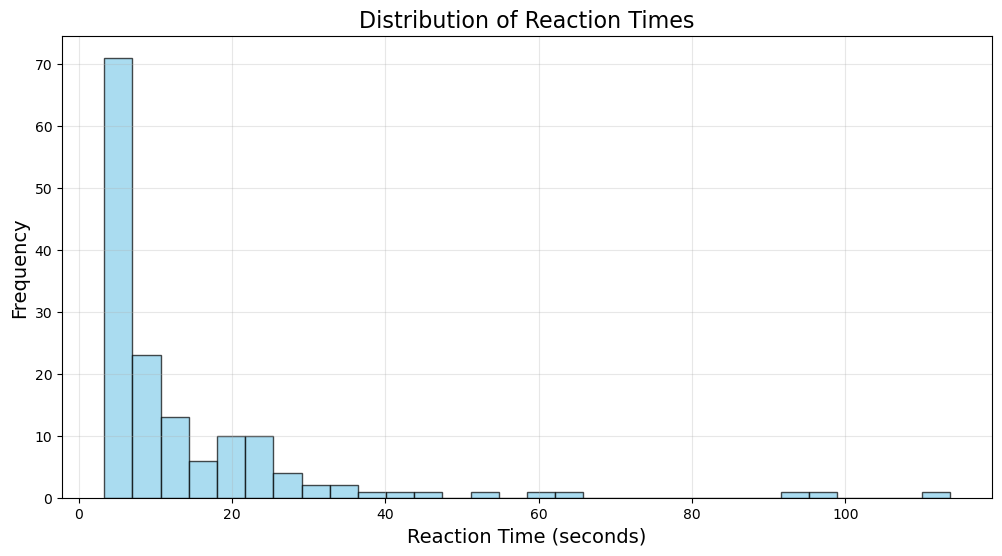

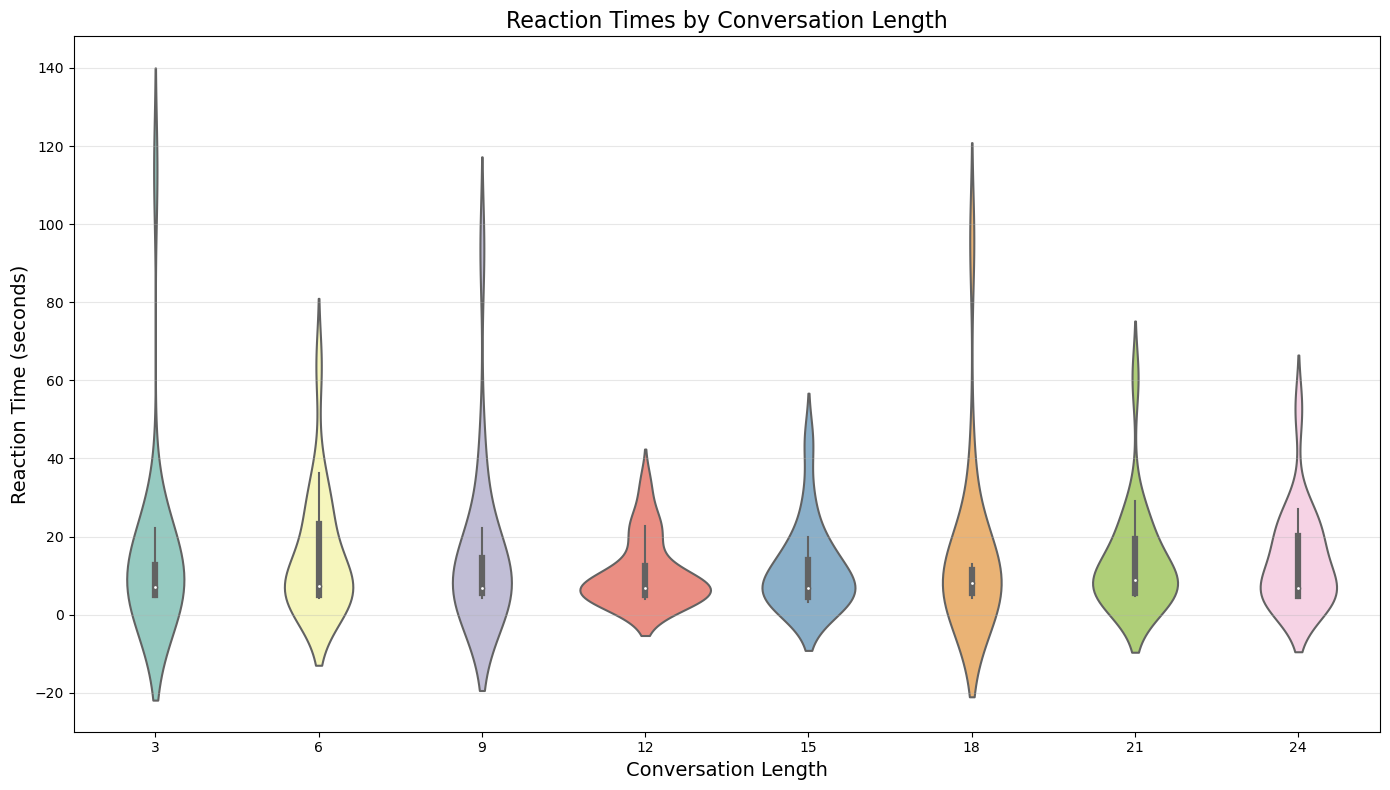


Reaction Time Statistics (in seconds):
Mean RT: 13.98 seconds
Median RT: 7.31 seconds
Min RT: 3.33 seconds
Max RT: 113.62 seconds
SD RT: 16.54 seconds

Average RT by Conversation Length:
Length 3: 15.07 ± 23.41 seconds
Length 6: 15.17 ± 15.07 seconds
Length 9: 15.71 ± 20.73 seconds
Length 12: 10.70 ± 8.17 seconds
Length 15: 12.05 ± 10.67 seconds
Length 18: 15.19 ± 21.57 seconds
Length 21: 13.77 ± 12.89 seconds
Length 24: 14.05 ± 12.06 seconds


In [15]:
# After your existing code, add:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert milliseconds to seconds for more intuitive interpretation
rt_all_seconds = [rt/1000 for rt in rt_all]

# Create a dictionary with RTs in seconds by length
rt_by_length_seconds = {}
for length in len_list:
    rt_by_length_seconds[length] = [rt/1000 for rt in rt_by_length[length]]

# Histogram of all RTs
plt.figure(figsize=(12, 6))
plt.hist(rt_all_seconds, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Reaction Times', fontsize=16)
plt.xlabel('Reaction Time (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.3)
#plt.savefig('rt_histogram.png', dpi=300)
plt.show()

# Create data for violin plot
violin_data = []
violin_labels = []
for length in len_list:
    violin_data.extend(rt_by_length_seconds[length])
    violin_labels.extend([str(length)] * len(rt_by_length_seconds[length]))

# Combine into a DataFrame for seaborn
import pandas as pd
violin_df = pd.DataFrame({
    'Reaction Time (seconds)': violin_data,
    'Conversation Length': violin_labels
})

# Violin plot by conversation length
plt.figure(figsize=(14, 8))
sns.violinplot(x='Conversation Length', y='Reaction Time (seconds)', 
               data=violin_df, inner='box', palette='Set3')
plt.title('Reaction Times by Conversation Length', fontsize=16)
plt.xlabel('Conversation Length', fontsize=14)
plt.ylabel('Reaction Time (seconds)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
#plt.savefig('rt_violinplot_by_length.png', dpi=300)
plt.show()

# Print basic statistics
print("\nReaction Time Statistics (in seconds):")
print(f"Mean RT: {np.mean(rt_all_seconds):.2f} seconds")
print(f"Median RT: {np.median(rt_all_seconds):.2f} seconds")
print(f"Min RT: {np.min(rt_all_seconds):.2f} seconds")
print(f"Max RT: {np.max(rt_all_seconds):.2f} seconds")
print(f"SD RT: {np.std(rt_all_seconds):.2f} seconds")

# Print average RT by conversation length
print("\nAverage RT by Conversation Length:")
for length in len_list:
    mean_rt = np.mean(rt_by_length_seconds[length])
    std_rt = np.std(rt_by_length_seconds[length])
    print(f"Length {length}: {mean_rt:.2f} ± {std_rt:.2f} seconds")

Extracting reaction times...
Total workers: 5
Workers with 5+ trials: 5


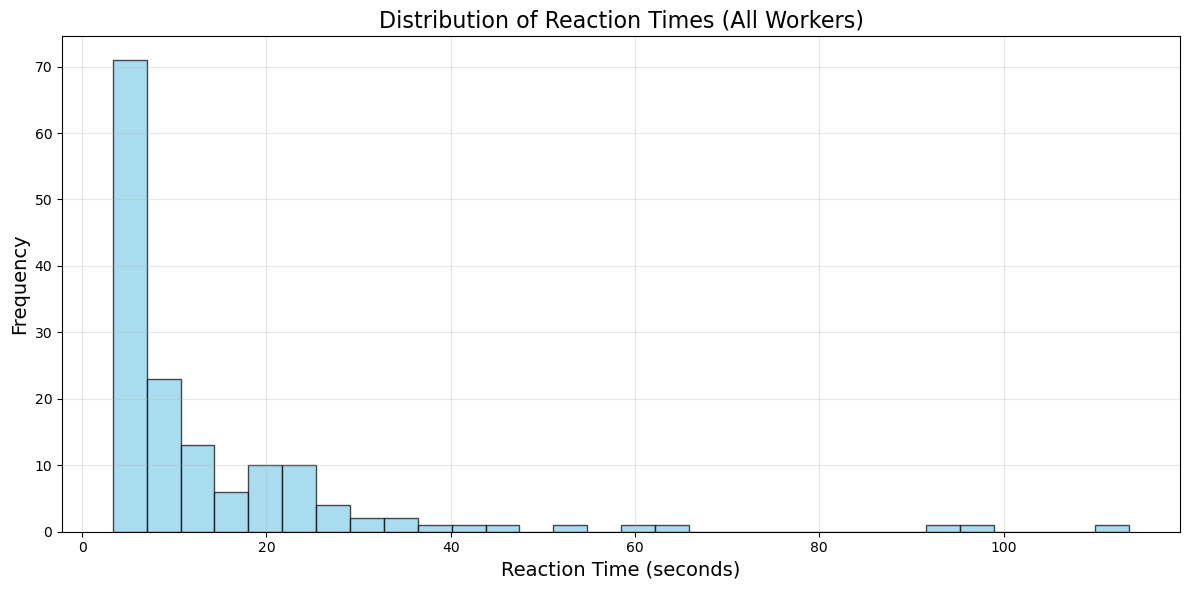

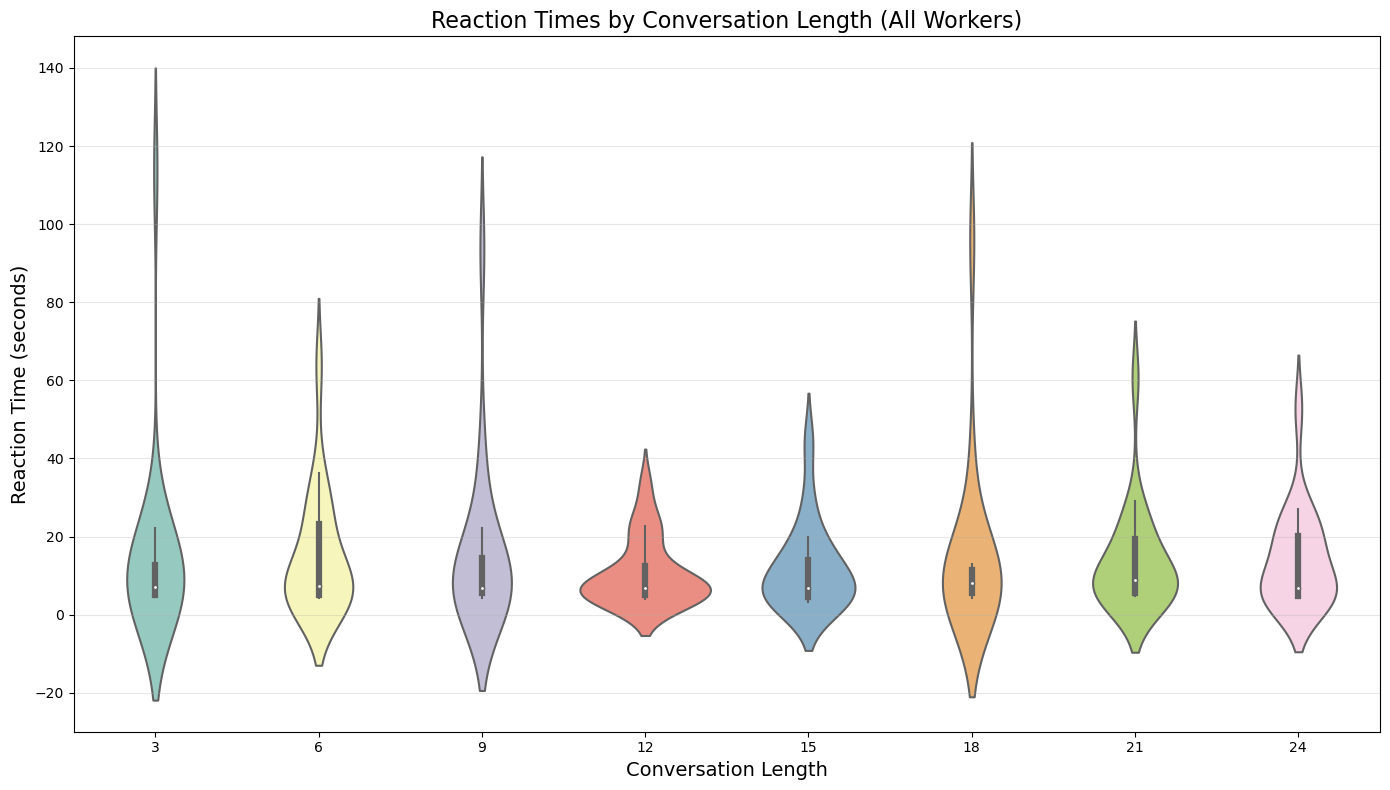

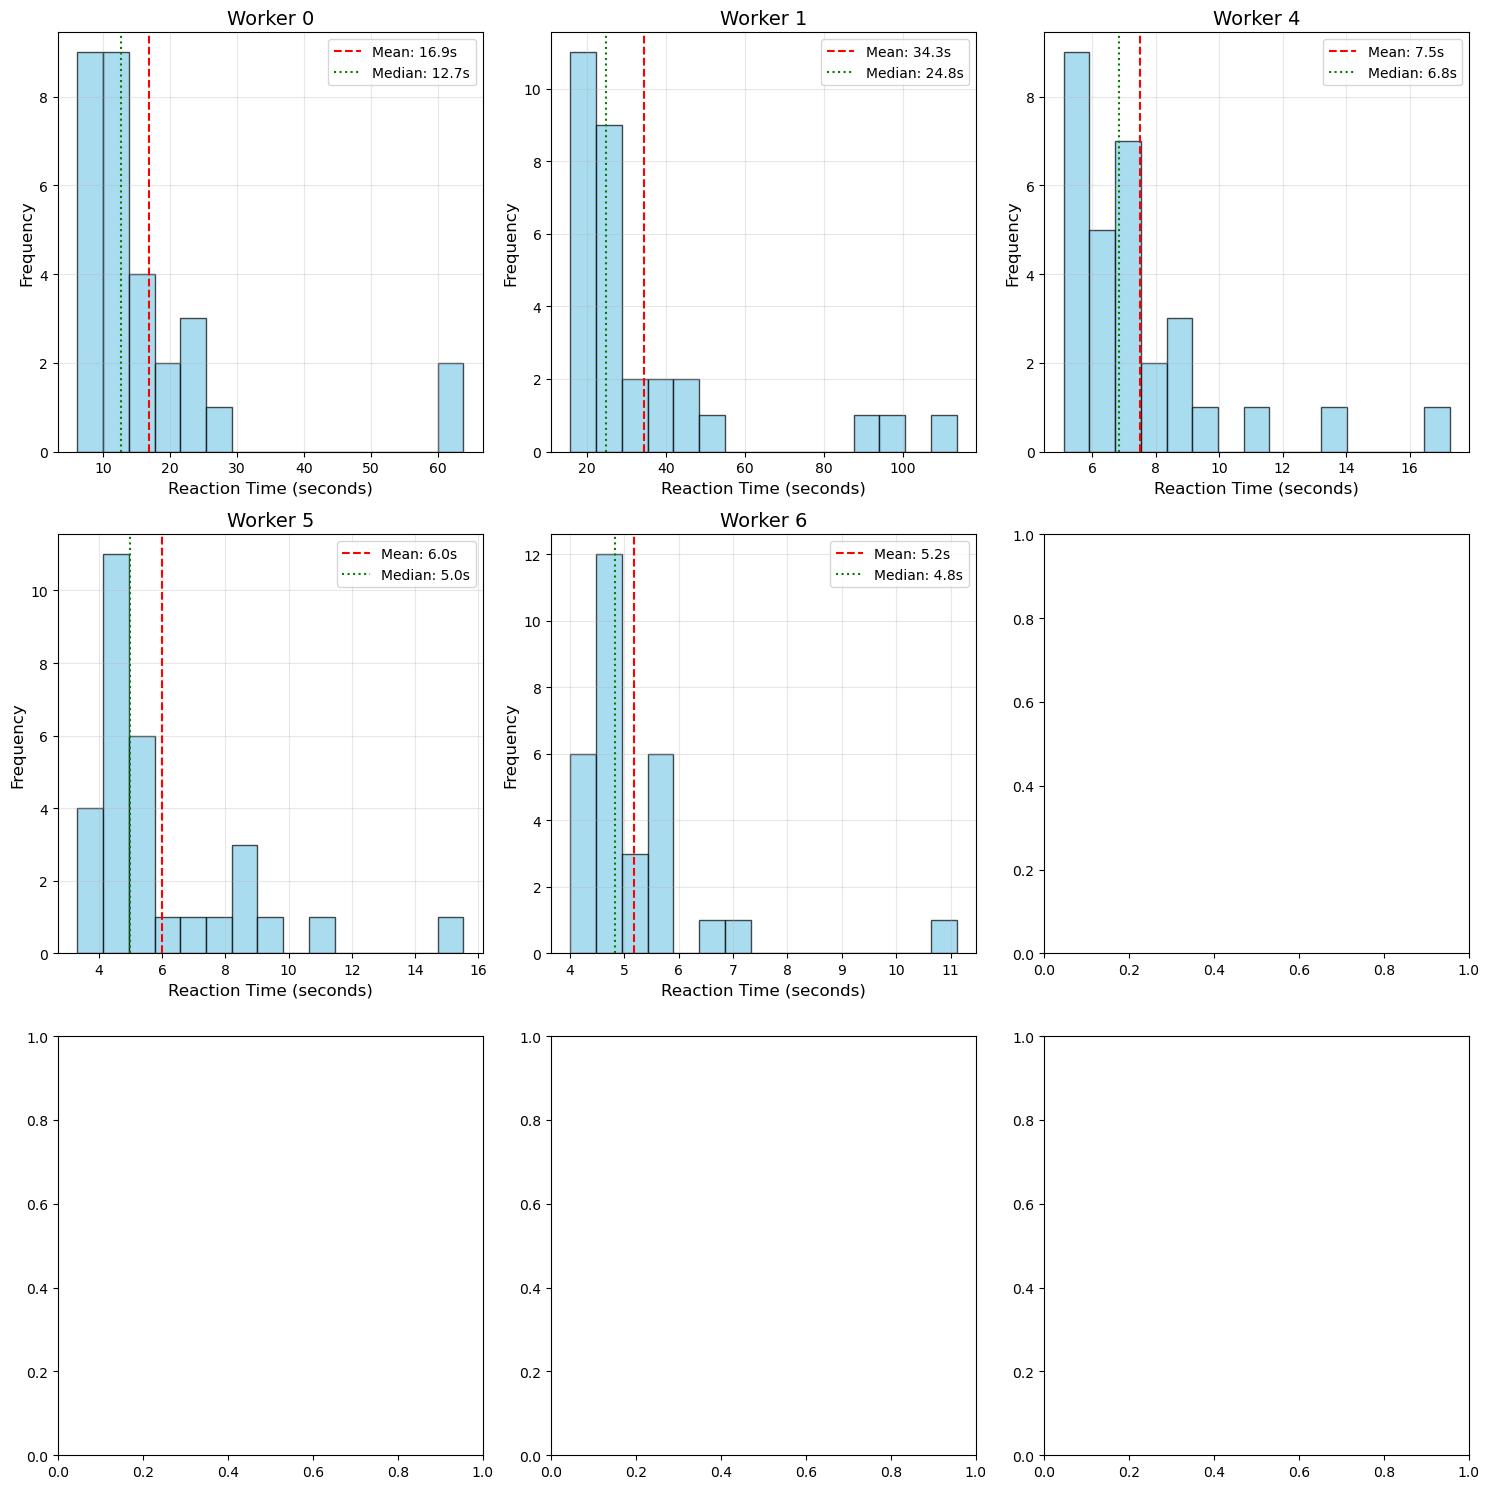

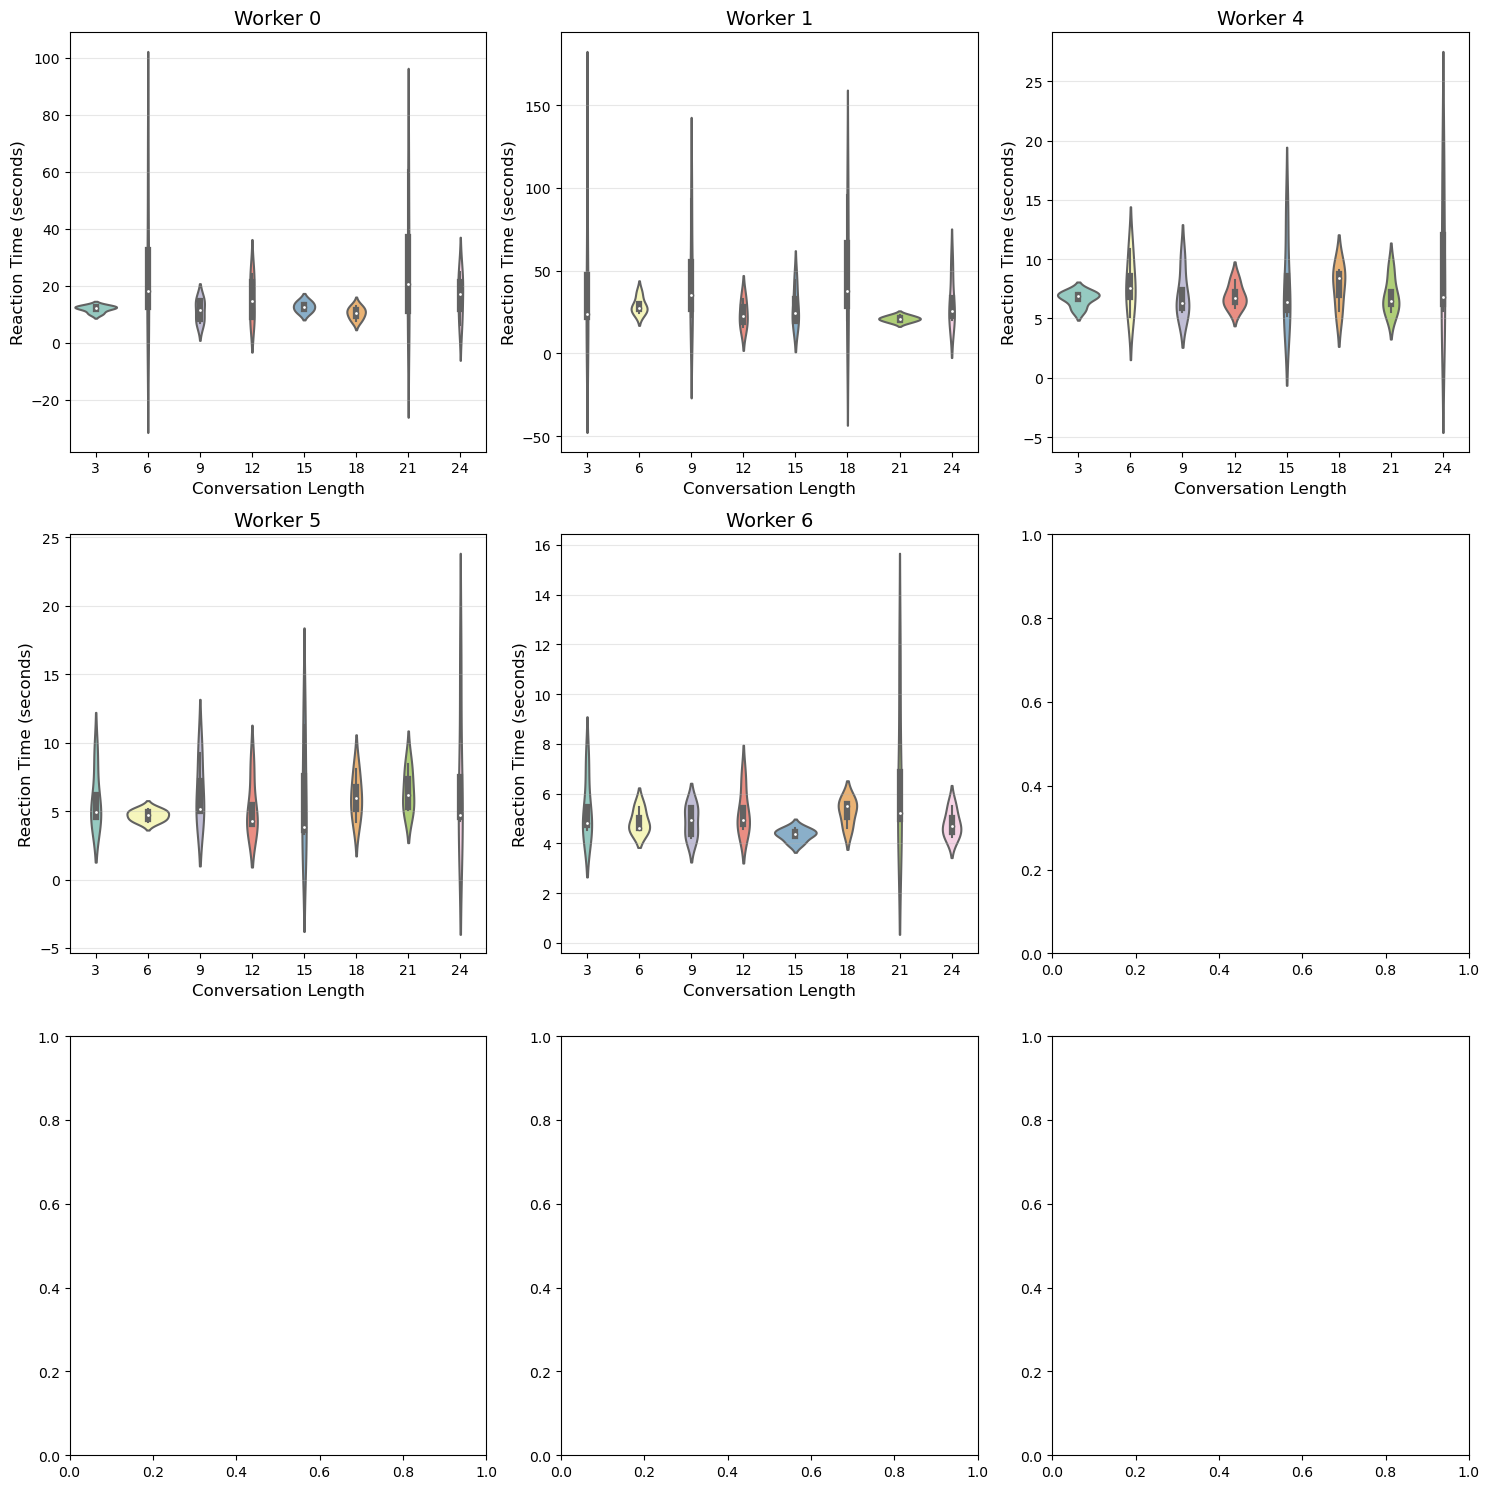


Overall Reaction Time Statistics (in seconds):
Mean RT: 13.98 seconds
Median RT: 7.31 seconds
Min RT: 3.33 seconds
Max RT: 113.62 seconds
SD RT: 16.54 seconds

Reaction Time Statistics by Worker (first 10 active workers):
Worker 0: Mean = 16.90s, Median = 12.71s, Min = 6.19s, Max = 63.81s, SD = 13.37s, N = 30
Worker 1: Mean = 34.30s, Median = 24.77s, Min = 15.79s, Max = 113.62s, SD = 23.88s, N = 30
Worker 4: Mean = 7.52s, Median = 6.85s, Min = 5.10s, Max = 17.26s, SD = 2.57s, N = 30
Worker 5: Mean = 6.00s, Median = 4.99s, Min = 3.33s, Max = 15.53s, SD = 2.59s, N = 30
Worker 6: Mean = 5.18s, Median = 4.83s, Min = 4.01s, Max = 11.11s, SD = 1.29s, N = 30


In [17]:
# Create data structures for reaction times
rt_all = []  # All reaction times
rt_by_length = {length: [] for length in len_list}  # RT by conversation length
rt_by_worker = {}  # Dictionary to store RTs for each worker
rt_by_worker_and_length = {}  # Dictionary to store RTs by worker and length

# Iterate through workers and collect reaction times
print("Extracting reaction times...")
for w in range(0, num_workers):
    if df["mode"][w] in ["live", "debug", "sandbox"] and df["endhit"][w] is not None:
        data = json.loads(df["datastring"][w])
        
        # Initialize data structures for this worker
        worker_id = w  # Using index as worker ID
        rt_by_worker[worker_id] = []
        rt_by_worker_and_length[worker_id] = {length: [] for length in len_list}
        
        # Process all workers regardless of correctness
        for c in range(num_conv):
            if c == 10 or c == 20:  # Skip catch trials
                continue
                
            try:
                # Extract trial data
                trial_data = data['data'][2+c]['trialdata']
                conv1_hit = trial_data['hit']
                conv1_len = trial_data['hit_len']
                conv1_rt = trial_data['rt']
                conv1_Aclass = trial_data['Aclass']
                
                # Skip if hit ID is out of range
                if conv1_hit > len(hit_topic_label):
                    continue
                
                # Store the reaction time data
                rt_all.append(conv1_rt)
                
                # Store by length
                if conv1_len in rt_by_length:
                    rt_by_length[conv1_len].append(conv1_rt)
                
                # Store by worker
                rt_by_worker[worker_id].append(conv1_rt)
                
                # Store by worker and length
                rt_by_worker_and_length[worker_id][conv1_len].append(conv1_rt)

            except (KeyError, IndexError, TypeError) as e:
                # Skip this trial if any data is missing
                continue

# Convert all RTs to seconds
rt_all_seconds = [rt/1000 for rt in rt_all]
rt_by_length_seconds = {length: [rt/1000 for rt in rts] for length, rts in rt_by_length.items()}
rt_by_worker_seconds = {worker: [rt/1000 for rt in rts] for worker, rts in rt_by_worker.items()}
rt_by_worker_and_length_seconds = {}
for worker, length_dict in rt_by_worker_and_length.items():
    rt_by_worker_and_length_seconds[worker] = {length: [rt/1000 for rt in rts] for length, rts in length_dict.items()}

# Filter out workers with too few trials (e.g., fewer than 5)
active_workers = [w for w in rt_by_worker_seconds.keys() if len(rt_by_worker_seconds[w]) >= 5]
print(f"Total workers: {len(rt_by_worker_seconds)}")
print(f"Workers with 5+ trials: {len(active_workers)}")

# Overall plots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Overall histogram of all reaction times
plt.figure(figsize=(12, 6))
plt.hist(rt_all_seconds, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Reaction Times (All Workers)', fontsize=16)
plt.xlabel('Reaction Time (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('rt_histogram_all.png', dpi=300)
plt.show()

# 2. Violin plot by conversation length (all workers)
violin_data = []
violin_labels = []
for length in len_list:
    violin_data.extend(rt_by_length_seconds[length])
    violin_labels.extend([str(length)] * len(rt_by_length_seconds[length]))

violin_df = pd.DataFrame({
    'Reaction Time (seconds)': violin_data,
    'Conversation Length': violin_labels
})

plt.figure(figsize=(14, 8))
sns.violinplot(x='Conversation Length', y='Reaction Time (seconds)', 
               data=violin_df, inner='box', palette='Set3')
plt.title('Reaction Times by Conversation Length (All Workers)', fontsize=16)
plt.xlabel('Conversation Length', fontsize=14)
plt.ylabel('Reaction Time (seconds)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('rt_violinplot_by_length_all.png', dpi=300)
plt.show()

# 3. Individual worker plots (first 9 active workers)
def plot_worker_rts(worker_ids, rows=3, cols=3):
    """Create plots for individual workers"""
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()  # Flatten 2D array of axes for easier indexing
    
    for i, worker_id in enumerate(worker_ids):
        if i >= rows*cols:
            break  # Only plot up to rows*cols workers
            
        # Get worker data
        worker_rts = rt_by_worker_seconds[worker_id]
        
        # Plot histogram for this worker
        axes[i].hist(worker_rts, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Worker {worker_id}', fontsize=14)
        axes[i].set_xlabel('Reaction Time (seconds)', fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].grid(alpha=0.3)
        
        # Add some stats
        mean_rt = np.mean(worker_rts)
        median_rt = np.median(worker_rts)
        axes[i].axvline(mean_rt, color='red', linestyle='--', label=f'Mean: {mean_rt:.1f}s')
        axes[i].axvline(median_rt, color='green', linestyle=':', label=f'Median: {median_rt:.1f}s')
        axes[i].legend(fontsize=10)
    
    plt.tight_layout()
    plt.savefig('rt_by_individual_workers.png', dpi=300)
    plt.show()

# Plot the first 9 active workers
plot_worker_rts(active_workers[:9])

# 4. Create violin plots of reaction time by length for each worker (first 9)
def plot_worker_rt_by_length(worker_ids, rows=3, cols=3):
    """Create violin plots showing RT by length for individual workers"""
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()  # Flatten 2D array of axes for easier indexing
    
    for i, worker_id in enumerate(worker_ids):
        if i >= rows*cols:
            break  # Only plot up to rows*cols workers
            
        # Create data for this worker's violin plot
        worker_violin_data = []
        worker_violin_labels = []
        for length in len_list:
            rts = rt_by_worker_and_length_seconds[worker_id][length]
            if rts:  # Only include lengths with data
                worker_violin_data.extend(rts)
                worker_violin_labels.extend([str(length)] * len(rts))
        
        worker_df = pd.DataFrame({
            'RT (seconds)': worker_violin_data,
            'Length': worker_violin_labels
        })
        
        # Plot violin for this worker
        if not worker_df.empty:
            sns.violinplot(x='Length', y='RT (seconds)', data=worker_df, ax=axes[i], 
                           inner='box', palette='Set3')
            axes[i].set_title(f'Worker {worker_id}', fontsize=14)
            axes[i].set_xlabel('Conversation Length', fontsize=12)
            axes[i].set_ylabel('Reaction Time (seconds)', fontsize=12)
            axes[i].grid(axis='y', alpha=0.3)
        else:
            axes[i].text(0.5, 0.5, 'No data available', 
                         horizontalalignment='center', verticalalignment='center')
            axes[i].set_title(f'Worker {worker_id}', fontsize=14)
    
    plt.tight_layout()
    plt.savefig('rt_by_length_individual_workers.png', dpi=300)
    plt.show()

# Plot the first 9 active workers' RTs by length
plot_worker_rt_by_length(active_workers[:9])

# 5. Calculate and print basic statistics
print("\nOverall Reaction Time Statistics (in seconds):")
print(f"Mean RT: {np.mean(rt_all_seconds):.2f} seconds")
print(f"Median RT: {np.median(rt_all_seconds):.2f} seconds")
print(f"Min RT: {np.min(rt_all_seconds):.2f} seconds")
print(f"Max RT: {np.max(rt_all_seconds):.2f} seconds")
print(f"SD RT: {np.std(rt_all_seconds):.2f} seconds")

# Print statistics for individual workers
print("\nReaction Time Statistics by Worker (first 10 active workers):")
for worker_id in active_workers[:10]:
    worker_rts = rt_by_worker_seconds[worker_id]
    print(f"Worker {worker_id}: Mean = {np.mean(worker_rts):.2f}s, Median = {np.median(worker_rts):.2f}s, " + 
          f"Min = {np.min(worker_rts):.2f}s, Max = {np.max(worker_rts):.2f}s, " + 
          f"SD = {np.std(worker_rts):.2f}s, N = {len(worker_rts)}")

In [ ]:
# RUN THIS
# this records the different lengths

rowidc = [] # stores the indices of the result framework that are changed
H_responses_all = [] # all cases together
AI_responses_all = []
H_responses_len3 = []
AI_responses_len3 = []
H_responses_len6 = []
AI_responses_len6 = []
H_responses_len9 = []
AI_responses_len9 = []
H_responses_len12 = []
AI_responses_len12 = []
H_responses_len15 = []
AI_responses_len15 = []
H_responses_len18 = []
AI_responses_len18 = []
H_responses_len21 = []
AI_responses_len21 = []
H_responses_len24 = []
AI_responses_len24 = []

H_inHH_responses_all = [] # for H-H or AI-AI
AI_inAIAI_responses_all = []
H_inHH_responses_len3 = []
AI_inAIAI_responses_len3 = []
H_inHH_responses_len6 = []
AI_inAIAI_responses_len6 = []
H_inHH_responses_len9 = []
AI_inAIAI_responses_len9 = []
H_inHH_responses_len12 = []
AI_inAIAI_responses_len12 = []
H_inHH_responses_len15 = []
AI_inAIAI_responses_len15 = []
H_inHH_responses_len18 = []
AI_inAIAI_responses_len18 = []
H_inHH_responses_len21 = []
AI_inAIAI_responses_len21 = []
H_inHH_responses_len24 = []
AI_inAIAI_responses_len24 = []

H_inHAI_responses_all = [] # for H-AI
AI_inHAI_responses_all = []
H_inHAI_responses_len3 = []
AI_inHAI_responses_len3 = []
H_inHAI_responses_len6 = []
AI_inHAI_responses_len6 = []
H_inHAI_responses_len9 = []
AI_inHAI_responses_len9 = []
H_inHAI_responses_len12 = []
AI_inHAI_responses_len12 = []
H_inHAI_responses_len15 = []
AI_inHAI_responses_len15 = []
H_inHAI_responses_len18 = []
AI_inHAI_responses_len18 = []
H_inHAI_responses_len21 = []
AI_inHAI_responses_len21 = []
H_inHAI_responses_len24 = []
AI_inHAI_responses_len24 = []
              

#num_conv = 20
worker_accepted = 0
worker_rejected = 0
counter_good_workers = 0
#for w in range(num_workers-12,num_workers):
for w in range(0,num_workers):
    if df["mode"][w] in ["live","debug","sandbox"]: # and df["endhit"][w] is not None:
    #if df["mode"][w] in ["sandbox"] and df["endhit"][w] is not None:
        print("")
        print("#### Worker {} ####".format(w))
        # load worker's data
        data = json.loads(df["datastring"][w])
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        print("% W data",Wgender,Wage,Wlanguage,Wdegree,Wfield)
        # keep a worker only if most of its answers are correct
        thr = 15#15 #CHANGE
        corr = 0 
        catch_corr = 0 
        counter_good_workers += 1
        # the MTurk participants now have 32 trials each
        num_conv = 32

        for c in range(num_conv):
            # skip the catch trials for now
            if c == 10 or c ==20: 
                conv1_topic = data['data'][2+c]['trialdata']['topic']
                if conv1_topic == "3":  # Assuming topic should be 3 for catch trials
                    catch_corr += 1 
                    continue
            conv1_hit = data['data'][2+c]['trialdata']['hit'] #Elisa modification: there are 2 lines of data that are for the prequestionnaire
            conv1_topic = data['data'][2+c]['trialdata']['topic']
            if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                corr += 1
        if corr >= thr: #and Wlanguage =='yes':
        #if w == 305:
            worker_accepted += 1
            for c in range(num_conv):
                # load responses to conv1
                conv1_hit = data['data'][2+c]['trialdata']['hit']
                conv1_len = data['data'][2+c]['trialdata']['hit_len']
                conv1_combclass = data['data'][2+c]['trialdata']['Aclass']
                print(conv1_combclass)
                if conv1_combclass == 'HH':
                    conv1_Aclass = 'H'
                    conv1_Bclass = 'H'
                elif conv1_combclass == 'HAI':
                    conv1_Aclass = 'H'
                    conv1_Bclass = 'AI'
                elif conv1_combclass == 'AIH':
                    conv1_Aclass = 'AI'
                    conv1_Bclass = 'H'
                elif conv1_combclass == 'AIAI':
                    conv1_Aclass = 'AI'
                    conv1_Bclass = 'AI'
                #conv1_Aclass = data['data'][1+c]['trialdata']['Aclass']
                #conv1_Bclass = data['data'][1+c]['trialdata']['Bclass']
                conv1_topic = data['data'][2+c]['trialdata']['topic']
                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    topic_correct = 'Keep'
                else:
                    topic_correct = 'Reject'
                print(c,"conv:",conv1_hit,conv1_len,conv1_Aclass,conv1_Bclass,conv1_topic,topic_correct)
                if topic_correct == 'Keep': # CHANGE
                    # compute number of words per conversation
                    path = "/Users/elisapavarino/Documents/Work_Directory/Kreiman_Lab/Turing Test Paper/TuringGithub/conversation/conversation_task/mturk_code/mturk_conversation_paper/static/dataset/"
                    ##with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html') as f:
                    ###with open('conversations_html/conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html') as f:
                    ##    lines_conv = f.readlines()
                    ##tot_words = 0
                    ##for line in lines_conv[0:-5]:
                    ##    #print(line)
                    ##    tot_words += len(line[6:-5].split())
                    # reaction time
                    ##conv1_rt = data['data'][2+c]['trialdata']['rt'] # absolute
                    conv1_rt_norm = 1 #conv1_rt/tot_words/1000 # normalized to num of words
                    # only keep conversation if the worker has taken enough time to read it
                    if conv1_rt_norm>=-0.1: #0.1 CHANGE
                        row_index = df_all_res.loc[(df_all_res["hit id"] == conv1_hit) & (df_all_res["hit len"] == conv1_len)].index[0]
                        df_all_res.at[row_index, "Aresponse"] = df_all_res.at[row_index, "Aresponse"] + [conv1_Aclass]
                        df_all_res.at[row_index, "Bresponse"] = df_all_res.at[row_index, "Bresponse"] + [conv1_Bclass]

                        #df_all_res.loc[row_index, "Aresponse"].append(conv1_Aclass)
                        #df_all_res.loc[row_index, "Bresponse"].append(conv1_Bclass)
                        rowidc.append(row_index)

                        # check if correct or not
                        if conv_list_Alab[conv1_hit-1] == 'Human':
                            if conv1_Aclass == 'H':
                                out = 1 # 1 = correctly classified
                            else:
                                out = 0 # 0 = incorrectly classified
                            H_responses_all.append(out)
                            if conv1_len == 3:
                                H_responses_len3.append(out)
                            elif conv1_len == 6:
                                H_responses_len6.append(out)
                            elif conv1_len == 9:
                                H_responses_len9.append(out)
                            elif conv1_len == 12:
                                H_responses_len12.append(out)
                            elif conv1_len == 15:
                                H_responses_len15.append(out)
                            elif conv1_len == 18:
                                H_responses_len18.append(out)
                            elif conv1_len == 21:
                                H_responses_len21.append(out)
                            elif conv1_len == 24:
                                H_responses_len24.append(out)
                            if conv_list_Blab[conv1_hit-1] == 'Human':
                                H_inHH_responses_all.append(out)
                                if conv1_len == 3:
                                    H_inHH_responses_len3.append(out)
                                elif conv1_len == 6:
                                    H_inHH_responses_len6.append(out)
                                elif conv1_len == 9:
                                    H_inHH_responses_len9.append(out)
                                elif conv1_len == 12:
                                    H_inHH_responses_len12.append(out)
                                elif conv1_len == 15:
                                    H_inHH_responses_len15.append(out)
                                elif conv1_len == 18:
                                    H_inHH_responses_len18.append(out)
                                elif conv1_len == 21:
                                    H_inHH_responses_len21.append(out)
                                elif conv1_len == 24:
                                    H_inHH_responses_len24.append(out)
                            else:
                                H_inHAI_responses_all.append(out)
                                if conv1_len == 3:
                                    H_inHAI_responses_len3.append(out)
                                elif conv1_len == 6:
                                    H_inHAI_responses_len6.append(out)
                                elif conv1_len == 9:
                                    H_inHAI_responses_len9.append(out)
                                elif conv1_len == 12:
                                    H_inHAI_responses_len12.append(out)
                                elif conv1_len == 15:
                                    H_inHAI_responses_len15.append(out)
                                elif conv1_len == 18:
                                    H_inHAI_responses_len18.append(out)
                                elif conv1_len == 21:
                                    H_inHAI_responses_len21.append(out)
                                elif conv1_len == 24:
                                    H_inHAI_responses_len24.append(out)


                        elif conv_list_Alab[conv1_hit-1] == 'AI':
                            if conv1_Aclass == 'AI':
                                out = 1 # 1 = correctly classified
                            else:
                                out = 0 # 0 = incorrectly classified
                            AI_responses_all.append(out)
                            if conv1_len == 3:
                                AI_responses_len3.append(out)
                            elif conv1_len == 6:
                                AI_responses_len6.append(out)
                            elif conv1_len == 9:
                                AI_responses_len9.append(out)
                            elif conv1_len == 12:
                                AI_responses_len12.append(out)
                            elif conv1_len == 15:
                                AI_responses_len15.append(out)
                            elif conv1_len == 18:
                                AI_responses_len18.append(out)
                            elif conv1_len == 21:
                                AI_responses_len21.append(out)
                            elif conv1_len == 24:
                                AI_responses_len24.append(out)
                            if conv_list_Blab[conv1_hit-1] == 'AI':
                                AI_inAIAI_responses_all.append(out)
                                if conv1_len == 3:
                                    AI_inAIAI_responses_len3.append(out)
                                elif conv1_len == 6:
                                    AI_inAIAI_responses_len6.append(out)
                                elif conv1_len == 9:
                                    AI_inAIAI_responses_len9.append(out)
                                elif conv1_len == 12:
                                    AI_inAIAI_responses_len12.append(out)
                                elif conv1_len == 15:
                                    AI_inAIAI_responses_len15.append(out)
                                elif conv1_len == 18:
                                    AI_inAIAI_responses_len18.append(out)
                                elif conv1_len == 21:
                                    AI_inAIAI_responses_len21.append(out)
                                elif conv1_len == 24:
                                    AI_inAIAI_responses_len24.append(out)
                            else:
                                AI_inHAI_responses_all.append(out)
                                if conv1_len == 3:
                                    AI_inHAI_responses_len3.append(out)
                                elif conv1_len == 6:
                                    AI_inHAI_responses_len6.append(out)
                                elif conv1_len == 9:
                                    AI_inHAI_responses_len9.append(out)
                                elif conv1_len == 12:
                                    AI_inHAI_responses_len12.append(out)
                                elif conv1_len == 15:
                                    AI_inHAI_responses_len15.append(out)
                                elif conv1_len == 18:
                                    AI_inHAI_responses_len18.append(out)
                                elif conv1_len == 21:
                                    AI_inHAI_responses_len21.append(out)
                                elif conv1_len == 24:
                                    AI_inHAI_responses_len24.append(out)

                        if conv_list_Blab[conv1_hit-1] == 'Human':
                            if conv1_Bclass == 'H':
                                out = 1
                            else:
                                out = 0
                            H_responses_all.append(out)
                            if conv1_len == 3:
                                H_responses_len3.append(out)
                            elif conv1_len == 6:
                                H_responses_len6.append(out)
                            elif conv1_len == 9:
                                H_responses_len9.append(out)
                            elif conv1_len == 12:
                                H_responses_len12.append(out)
                            elif conv1_len == 15:
                                H_responses_len15.append(out)
                            elif conv1_len == 18:
                                H_responses_len18.append(out)
                            elif conv1_len == 21:
                                H_responses_len21.append(out)
                            elif conv1_len == 24:
                                H_responses_len24.append(out)
                            if conv_list_Alab[conv1_hit-1] == 'Human':
                                H_inHH_responses_all.append(out)
                                if conv1_len == 3:
                                    H_inHH_responses_len3.append(out)
                                elif conv1_len == 6:
                                    H_inHH_responses_len6.append(out)
                                elif conv1_len == 9:
                                    H_inHH_responses_len9.append(out)
                                elif conv1_len == 12:
                                    H_inHH_responses_len12.append(out)
                                elif conv1_len == 15:
                                    H_inHH_responses_len15.append(out)
                                elif conv1_len == 18:
                                    H_inHH_responses_len18.append(out)
                                elif conv1_len == 21:
                                    H_inHH_responses_len21.append(out)
                                elif conv1_len == 24:
                                    H_inHH_responses_len24.append(out)
                            else:
                                H_inHAI_responses_all.append(out)
                                if conv1_len == 3:
                                    H_inHAI_responses_len3.append(out)
                                elif conv1_len == 6:
                                    H_inHAI_responses_len6.append(out)
                                elif conv1_len == 9:
                                    H_inHAI_responses_len9.append(out)
                                elif conv1_len == 12:
                                    H_inHAI_responses_len12.append(out)
                                elif conv1_len == 15:
                                    H_inHAI_responses_len15.append(out)
                                elif conv1_len == 18:
                                    H_inHAI_responses_len18.append(out)
                                elif conv1_len == 21:
                                    H_inHAI_responses_len21.append(out)
                                elif conv1_len == 24:
                                    H_inHAI_responses_len24.append(out)

                        elif conv_list_Blab[conv1_hit-1] == 'AI':
                            if conv1_Bclass == 'AI':
                                out = 1
                            else:
                                out = 0
                            AI_responses_all.append(out)
                            if conv1_len == 3:
                                AI_responses_len3.append(out)
                            elif conv1_len == 6:
                                AI_responses_len6.append(out)
                            elif conv1_len == 9:
                                AI_responses_len9.append(out)
                            elif conv1_len == 12:
                                AI_responses_len12.append(out)
                            elif conv1_len == 15:
                                AI_responses_len15.append(out)
                            elif conv1_len == 18:
                                AI_responses_len18.append(out)
                            elif conv1_len == 21:
                                AI_responses_len21.append(out)
                            elif conv1_len == 24:
                                AI_responses_len24.append(out)
                            if conv_list_Alab[conv1_hit-1] == 'AI':
                                AI_inAIAI_responses_all.append(out)
                                if conv1_len == 3:
                                    AI_inAIAI_responses_len3.append(out)
                                elif conv1_len == 6:
                                    AI_inAIAI_responses_len6.append(out)
                                elif conv1_len == 9:
                                    AI_inAIAI_responses_len9.append(out)
                                elif conv1_len == 12:
                                    AI_inAIAI_responses_len12.append(out)
                                elif conv1_len == 15:
                                    AI_inAIAI_responses_len15.append(out)
                                elif conv1_len == 18:
                                    AI_inAIAI_responses_len18.append(out)
                                elif conv1_len == 21:
                                    AI_inAIAI_responses_len21.append(out)
                                elif conv1_len == 24:
                                    AI_inAIAI_responses_len24.append(out)
                            else:
                                AI_inHAI_responses_all.append(out)
                                if conv1_len == 3:
                                    AI_inHAI_responses_len3.append(out)
                                elif conv1_len == 6:
                                    AI_inHAI_responses_len6.append(out)
                                elif conv1_len == 9:
                                    AI_inHAI_responses_len9.append(out)
                                elif conv1_len == 12:
                                    AI_inHAI_responses_len12.append(out)
                                elif conv1_len == 15:
                                    AI_inHAI_responses_len15.append(out)
                                elif conv1_len == 18:
                                    AI_inHAI_responses_len18.append(out)
                                elif conv1_len == 21:
                                    AI_inHAI_responses_len21.append(out)
                                elif conv1_len == 24:
                                    AI_inHAI_responses_len24.append(out)
        else:
            print("Worker excluded since there are {} misclassified topics".format(20-corr))
            worker_rejected += 1
            #print(df["mode"][w])
            

print("==========================================")
print("Workers accepted",worker_accepted)
print("Workers rejected",worker_rejected)


#### Worker 10 ####
% W data female 31-35 yes high school United States
HH
0 conv: 250 9 H H 4 Keep
AIH
1 conv: 107 24 AI H 5 Keep


In [ ]:
# df_all_res.loc[] 
nonzero_indices = df_all_res.loc[:,'Aresponse'].apply(lambda x: len(x)).values> 0


In [ ]:
plt.hist(df_all_res.loc[nonzero_indices,'Aresponse'].apply(lambda x: len(x)).values)

In [ ]:
unique_response_count = np.array([len(np.unique(i)) for i in df_all_res.Aresponse.values])
# df_all_res.loc[np.where(unique_response_count > 1)[0]]

# unique_response_count = np.array([len(np.unique(i)) for i in df_all_res.iloc[np.where(df_all_res.loc[ :,'Aresponse'].apply(lambda x: len(x)).values)[0]>3].Aresponse.values])
df_all_res.iloc[np.where(df_all_res.loc[ :,'Aresponse'].apply(lambda x: len(x)>1).values)[0]]


In [ ]:
len(H_responses_len3 + H_responses_len6 + H_responses_len9 + H_responses_len12 + H_responses_len15 + H_responses_len18 + H_responses_len21 + H_responses_len24)

In [ ]:
len(AI_responses_len3 + AI_responses_len6 + AI_responses_len9 + AI_responses_len12 + AI_responses_len15 + AI_responses_len18 + AI_responses_len21 + AI_responses_len24)

In [ ]:
128+176

In [ ]:
H_len_trend = []
AI_len_trend = []

H_len_trend.append(np.mean(H_responses_len3))
H_len_trend.append(np.mean(H_responses_len6))
H_len_trend.append(np.mean(H_responses_len9))
H_len_trend.append(np.mean(H_responses_len12))
H_len_trend.append(np.mean(H_responses_len15))
H_len_trend.append(np.mean(H_responses_len18))
H_len_trend.append(np.mean(H_responses_len21))
H_len_trend.append(np.mean(H_responses_len24))

AI_len_trend.append(np.mean(AI_responses_len3))
AI_len_trend.append(np.mean(AI_responses_len6))
AI_len_trend.append(np.mean(AI_responses_len9))
AI_len_trend.append(np.mean(AI_responses_len12))
AI_len_trend.append(np.mean(AI_responses_len15))
AI_len_trend.append(np.mean(AI_responses_len18))
AI_len_trend.append(np.mean(AI_responses_len21))
AI_len_trend.append(np.mean(AI_responses_len24))

H_len_trend_rev = [1-x for x in H_len_trend]
AI_len_trend_rev = [1-x for x in AI_len_trend]

print("++++++++  Mean over all length ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_all),2),"over trials",len(H_responses_all))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_all),2),len(AI_responses_all))

print("++++++++  Length 3 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len3),2), "over trials",len(H_responses_len3))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len3),2), len(AI_responses_len3))

print("++++++++  Length 6 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len6),2), len(H_responses_len6))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len6),2), len(AI_responses_len6))

print("++++++++  Length 9 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len9),2), len(H_responses_len9))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len9),2), len(AI_responses_len9))

print("++++++++  Length 12 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len12),2), len(H_responses_len12))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len12),2), len(AI_responses_len12))

print("++++++++  Length 15 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len15),2), len(H_responses_len15))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len15),2), len(AI_responses_len15))

print("++++++++  Length 18 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len18),2), len(H_responses_len18))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len18),2), len(AI_responses_len18))

print("++++++++  Length 21 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len21),2), len(H_responses_len21))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len21),2), len(AI_responses_len21))

print("++++++++  Length 24 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len24),2), len(H_responses_len24))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len24),2), len(AI_responses_len24))

plt.figure(figsize=(8,6))
plt.plot([3,6,9,12,15,18,21,24],H_len_trend,"o-",lw=2,label='Humans classified as Humans',color='forestgreen')
plt.plot([3,6,9,12,15,18,21,24],AI_len_trend_rev,"o-",lw=2,label='AI classified as Humans',color='darkorange')
#plt.plot([3,6,9,12,15],AI_len_trend,"o--",label='AI classified as AI',color='darkorange',alpha=0.2)
#plt.plot([3,6,9,12,15],H_len_trend_rev,"o--",label='Humans classified as AI',color='forestgreen',alpha=0.2)

plt.axhline(y=np.mean(H_responses_all), color='forestgreen', linestyle='--',alpha=0.8,label='mean H->H')
plt.axhline(y=1-np.mean(AI_responses_all), color='darkorange', linestyle='--',alpha=0.8, label='mean AI->H')

plt.legend()
plt.xlabel("Number of exchanges",fontsize=14)
plt.ylabel("Fraction classified as Human",fontsize=14)
#plt.xticks
#plt.ylim([0.35,0.75])
plt.xticks(np.arange(3, 27, step=3),fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("res_mean.svg")


## Add second plot for AI

plt.figure(figsize=(8,6))
plt.plot([3,6,9,12,15,18,21,24],AI_len_trend,"o-",lw=2,label='AI classified as AI',color='forestgreen')
plt.plot([3,6,9,12,15,18,21,24],H_len_trend_rev,"o-",lw=2,label='Humans classified as AI',color='darkorange')
#plt.plot([3,6,9,12,15],AI_len_trend,"o--",label='AI classified as AI',color='darkorange',alpha=0.2)
#plt.plot([3,6,9,12,15],H_len_trend_rev,"o--",label='Humans classified as AI',color='forestgreen',alpha=0.2)

plt.axhline(y=np.mean(AI_responses_all), color='forestgreen', linestyle='--',alpha=0.8,label='mean AI->AI')
plt.axhline(y=1-np.mean(H_responses_all), color='darkorange', linestyle='--',alpha=0.8, label='mean H->AI')

plt.legend()
plt.xlabel("Number of exchanges",fontsize=14)
plt.ylabel("Fraction classified as AI",fontsize=14)
#plt.xticks
#plt.ylim([0.35,0.75])
plt.xticks(np.arange(3, 27, step=3),fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("res_mean2.svg")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define conversation lengths (same as in previous code)
hit_lengths = [3, 6, 9, 12, 15, 18, 21, 24]

# Compute classification fractions
H_correct = [np.mean(H_responses_len3), np.mean(H_responses_len6), np.mean(H_responses_len9),
             np.mean(H_responses_len12), np.mean(H_responses_len15), np.mean(H_responses_len18),
             np.mean(H_responses_len21), np.mean(H_responses_len24)]

AI_correct = [np.mean(AI_responses_len3), np.mean(AI_responses_len6), np.mean(AI_responses_len9),
              np.mean(AI_responses_len12), np.mean(AI_responses_len15), np.mean(AI_responses_len18),
              np.mean(AI_responses_len21), np.mean(AI_responses_len24)]

# Compute mean values
mean_H_correct = np.mean(H_correct)
mean_AI_correct = np.mean(AI_correct)

# Create the plot
plt.figure(figsize=(6, 5))
plt.plot(hit_lengths, H_correct, marker='o', linestyle='-', color='green', label="Humans classified as Humans")
plt.plot(hit_lengths, AI_correct, marker='o', linestyle='-', color='orange', label="AI classified as AI")

# Add mean lines
plt.axhline(mean_H_correct, linestyle="dashed", color="green", alpha=0.7, label="mean H->H")
plt.axhline(mean_AI_correct, linestyle="dashed", color="orange", alpha=0.7, label="mean AI->H")

# Labels and legend
plt.xlabel("Number of exchanges")
plt.ylabel("Fraction classified as Human")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define confusion matrix values
H_H = sum(H_responses_all)  # Human correctly classified
H_AI = len(H_responses_all) - H_H  # Human misclassified as AI
AI_AI = sum(AI_responses_all)  # AI correctly classified
AI_H = len(AI_responses_all) - AI_AI  # AI misclassified as Human


# Build confusion matrix
conf_matrix = np.array([[H_H, H_AI],
                        [AI_H, AI_AI]])

# Normalize to probabilities (row-wise normalization)
conf_matrix = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create heatmap visualization
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=["Labeled Human", "Labeled AI"],
            yticklabels=["Actual Human", "Actual AI"])

# Labels
plt.xlabel("Label of Expert Judge")
plt.ylabel("True Identity")
plt.title("Confusion Matrix of AI Expert")
plt.show()


In [ ]:
# repeat by separating for H the cases H-H/H-AI and for AI the cases H-AI/AI-AI

H_inHH_len_trend = []
AI_inAIAI_len_trend = []
H_inHAI_len_trend = []
AI_inHAI_len_trend = []

H_inHH_len_trend.append(np.mean(H_inHH_responses_len3))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len6))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len9))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len12))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len15))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len18))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len21))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len24))

AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len3))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len6))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len9))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len12))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len15))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len18))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len21))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len24))
0
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len3))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len6))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len9))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len12))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len15))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len18))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len21))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len24))

AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len3))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len6))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len9))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len12))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len15))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len18))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len21))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len24))

#H_len_trend_rev = [1-x for x in H_len_trend]
#AI_len_trend_rev = [1-x for x in AI_len_trend]
AI_inAIAI_len_trend_rev = [1-x for x in AI_inAIAI_len_trend]
AI_inHAI_len_trend_rev = [1-x for x in AI_inHAI_len_trend]

print("++++++++  Mean over all length ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_all),2),"over trials",len(H_responses_all))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_all),2),"over trials",len(H_responses_all))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_all),2),len(AI_responses_all))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_all),2),len(AI_responses_all))

print("++++++++  Length 3 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len3),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len3),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len3),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len3),2))

print("++++++++  Length 6 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len6),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len6),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len6),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len6),2))

print("++++++++  Length 9 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len9),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len9),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len9),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len9),2))

print("++++++++  Length 12 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len12),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len12),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len12),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len12),2))

print("++++++++  Length 15 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len15),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len15),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len15),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len15),2))

print("++++++++  Length 18 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len18),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len18),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len18),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len18),2))

print("++++++++  Length 21 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len21),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len21),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len21),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len21),2))

print("++++++++  Length 24 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len24),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len24),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len24),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len24),2))

plt.figure(figsize=(8,6))
plt.plot([3,6,9,12,15,18,21,24],H_len_trend,"o-",lw=2,label='Humans classified as Humans',color='forestgreen')
plt.plot([3,6,9,12,15,18,21,24],H_inHH_len_trend,"--",lw=2,label='Humans classified as Humans in H-H',color='forestgreen')
plt.plot([3,6,9,12,15,18,21,24],H_inHAI_len_trend,":",lw=2,label='Humans classified as Humans in H-AI',color='forestgreen')

plt.plot([3,6,9,12,15,18,21,24],AI_len_trend_rev,"o-",lw=2,label='AI classified as Humans',color='darkorange')
plt.plot([3,6,9,12,15,18,21,24],AI_inAIAI_len_trend_rev,"--",lw=2,label='AI classified as Humans in AI-AI',color='darkorange')
plt.plot([3,6,9,12,15,18,21,24],AI_inHAI_len_trend_rev,":",lw=2,label='AI classified as Humans in H-AI',color='darkorange')
plt.legend(loc=(1,0))
plt.xlabel("Number of exchanges",fontsize=14)
plt.ylabel("Fraction classified as Human",fontsize=14)
plt.xticks
plt.ylim([0.1, 1])
plt.xticks(np.arange(3, 27, step=3),fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("res_separate.svg")


plt.figure(figsize=(8,6))
plt.plot([3,6,9,12,15,18,21,24],H_len_trend,"o-",lw=2,label='Humans classified as Humans',color='forestgreen')
plt.plot([3,6,9,12,15,18,21,24],H_inHH_len_trend,"--",lw=2,label='Humans classified as Humans in H-H',color='forestgreen')
plt.plot([3,6,9,12,15,18,21,24],H_inHAI_len_trend,":",lw=2,label='Humans classified as Humans in H-AI',color='forestgreen')
plt.legend(loc=(1,0))
plt.xlabel("Number of exchanges",fontsize=14)
plt.ylabel("Fraction classified as Human",fontsize=14)
plt.xticks
plt.ylim([0.1, 1])
plt.xticks(np.arange(3, 27, step=3),fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("res_separate.svg")


plt.figure(figsize=(8,6))
plt.plot([3,6,9,12,15,18,21,24],AI_len_trend_rev,"o-",lw=2,label='AI classified as Humans',color='darkorange')
plt.plot([3,6,9,12,15,18,21,24],AI_inAIAI_len_trend_rev,"--",lw=2,label='AI classified as Humans in AI-AI',color='darkorange')
plt.plot([3,6,9,12,15,18,21,24],AI_inHAI_len_trend_rev,":",lw=2,label='AI classified as Humans in H-AI',color='darkorange')

#plt.plot([3,6,9,12,15],AI_len_trend,"o--",label='AI classified as AI',color='darkorange',alpha=0.2)
#plt.plot([3,6,9,12,15],H_len_trend_rev,"o--",label='Humans classified as AI',color='forestgreen',alpha=0.2)

#plt.axhline(y=np.mean(H_responses_all), color='forestgreen', linestyle='--',alpha=0.8,label='mean H->H')
#plt.axhline(y=1-np.mean(AI_responses_all), color='darkorange', linestyle='--',alpha=0.8, label='mean AI->H')

plt.legend(loc=(1,0))
plt.xlabel("Number of exchanges",fontsize=14)
plt.ylabel("Fraction classified as Human",fontsize=14)
plt.xticks
plt.ylim([0,0.75])
plt.xticks(np.arange(3, 27, step=3),fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("res_separate.svg")

In [2]:
import os
import json
import sqlite3

from __future__ import generator_stop
from flask import Blueprint, render_template, request, jsonify, Response, abort, current_app
from jinja2 import TemplateNotFound
from functools import wraps
from sqlalchemy import or_

from psiturk.psiturk_config import PsiturkConfig
from psiturk.experiment_errors import ExperimentError, InvalidUsageError
from psiturk.user_utils import PsiTurkAuthorization, nocache

# # Database setup
from psiturk.db import db_session, init_db
from psiturk.models import Participant
from json import dumps, loads


import os
import json
import sqlite3

def compute_bonus(participant_id):
    # Connect to your database
    conn = sqlite3.connect('participants.db')
    c = conn.cursor()
    
    # Query to get participant's data
    c.execute("SELECT datastring FROM turkdemo WHERE uniqueid = ?", (participant_id,))
    result = c.fetchone()
    
    if not result:
        return 0.0  # Return 0 if no data found
    
    # Parse the JSON data
    datastring = result[0]
    data = json.loads(datastring)
    
    # Access the specific data we saved
    questiondata = data.get('questiondata', {})
    
    # Get human/AI accuracy
    humanai_correct = int(questiondata.get('correct_humanai', 0))
    
    # Calculate bonus amount: $0.10 per correct classification
    bonus_amount = round(humanai_correct * 0.10, 2)
    
    # Optional: Cap the maximum bonus
    max_bonus = 3.20  # $6.00 maximum (allows for 60 correct classifications)
    bonus_amount = min(bonus_amount, max_bonus)
    
    return bonus_amount

In [5]:
conn = sqlite3.connect('participants.db')
c = conn.cursor()
    
# Query to get participant's data
c.execute("SELECT datastring FROM TuringConversationalAI WHERE uniqueid = ?", (participant_id,))
result = c.fetchone()
    
if not result:
    return 0.0  # Return 0 if no data found
    
# Parse the JSON data
datastring = result[0]
data = json.loads(datastring)
    
# Access the specific data we saved
questiondata = data.get('questiondata', {})
    
# Get human/AI accuracy
humanai_correct = int(questiondata.get('correct_humanai', 0))
    
# Calculate bonus amount: $0.10 per correct classification
bonus_amount = round(humanai_correct * 0.10, 2)
    
# Optional: Cap the maximum bonus
max_bonus = 3.20  # $6.00 maximum (allows for 60 correct classifications)
bonus_amount = min(bonus_amount, max_bonus)
    

SyntaxError: 'return' outside function (2687388855.py, line 9)

In [6]:
import sqlite3
import json

# The worker ID you want to test
test_id = "A3EDT5UMQA5EJE:3KKG4CDWKU5VFE6E5WL9PAWDWY6944"

# Connect to your PsiTurk database
conn = sqlite3.connect('participants.db')  # Adjust path if needed
c = conn.cursor()

# Run the query
c.execute("SELECT datastring FROM TuringConversationalAI WHERE uniqueid = ?", (test_id,))
result = c.fetchone()

if result:
    print("Participant found!")
    
    # Parse and explore the data
    data = json.loads(result[0])
    
    # Print some basic info to verify
    print(f"Mode: {data.get('mode', 'Not found')}")
    print(f"Condition: {data.get('condition', 'Not found')}")
    
    # Look for questiondata (where unstructured data is stored)
    questiondata = data.get('questiondata', {})
    print(f"Question data keys: {list(questiondata.keys())}")
    
    # Look at some trial data
    trials = data.get('data', [])
    print(f"Number of trials: {len(trials)}")
    
    # Print a sample trial if available
    if trials:
        print("\nSample trial data:")
        sample_trial = next((t for t in trials if 'trialdata' in t), None)
        if sample_trial:
            print(json.dumps(sample_trial['trialdata'], indent=2))
else:
    print(f"No participant found with ID: {test_id}")
    
    # Try a wildcard search to see if similar IDs exist
    c.execute("SELECT uniqueid FROM turkdemo WHERE uniqueid LIKE ?", (f"%{test_id.split(':')[0]}%",))
    similar_ids = c.fetchall()
    
    if similar_ids:
        print("\nSimilar IDs found:")
        for similar_id in similar_ids:
            print(f"- {similar_id[0]}")
    else:
        print("No similar IDs found")

# Don't forget to close the connection
conn.close()

Participant found!
Mode: live
Condition: 0
Question data keys: ['education', 'native', 'country', 'engagement', 'mode', 'feedback_view_time_trial_10', 'difficulty', 'feedback_view_time_trial_9', 'feedback_view_time_trial_8', 'feedback_view_time_trial_7', 'gender', 'age', 'feedback_view_time_trial_4', 'feedback_view_time_trial_3', 'feedback_view_time_trial_2', 'feedback_view_time_trial_1', 'feedback_view_time_trial_0', 'feedback_view_time_trial_15', 'feedback_view_time_trial_14', 'feedback_view_time_trial_13', 'feedback_view_time_trial_12', 'feedback_view_time_trial_11', 'feedback_view_time_trial_6', 'catch_trials', 'feedback_view_time_trial_5']
Number of trials: 36

Sample trial data:
{
  "phase": "INSTRUCTIONS",
  "templates": [
    "prequestionnaire.html",
    "instructions/instruct-1.html",
    "instructions/instruct-ready.html"
  ],
  "action": "Begin"
}
